In [5]:
%load_ext autoreload
%autoreload 2

In [20]:
from yams import roll_dice, SHEET_KEYS, print_pretty_sheet
import agents

my_sheet = {k: None for k in SHEET_KEYS}
my_sheet["Chance"] = 10
throw = roll_dice()

print(throw)
throw_eval = agents.get_sheet_points(my_sheet, throw)
print(throw_eval)
best_eval = agents.best_evaluation(throw_eval)
print(best_eval)

(2, 2, 2, 3, 4)
{1: 0, 2: 6, 3: 3, 4: 4, 5: 0, 6: 0, 'Bonus': 0, 'Chance': 0, 'Brelan': 6, 'Carré': 0, 'Full': 0, 'Petite Suite': 0, 'Grande Suite': 0, 'Yams': 0}
('Brelan', 6)


In [21]:
agents.generate_all_throws((2, 2, 3))

[(1, 2, 2, 2, 3),
 (2, 2, 3, 4, 6),
 (2, 2, 3, 6, 6),
 (1, 2, 2, 3, 4),
 (2, 2, 2, 3, 5),
 (2, 2, 3, 3, 4),
 (2, 2, 2, 2, 3),
 (2, 2, 3, 4, 5),
 (2, 2, 2, 3, 4),
 (2, 2, 3, 5, 6),
 (1, 2, 2, 3, 6),
 (1, 2, 2, 3, 3),
 (2, 2, 3, 3, 3),
 (2, 2, 3, 3, 6),
 (1, 1, 2, 2, 3),
 (2, 2, 3, 4, 4),
 (2, 2, 3, 5, 5),
 (2, 2, 2, 3, 3),
 (1, 2, 2, 3, 5),
 (2, 2, 2, 3, 6),
 (2, 2, 3, 3, 5)]

In [10]:

agent = agents.YamsT1T()

fake_sheet = {k: None for k in agents.SHEET_KEYS}
fake_sheet["Chance"] = 10
fake_sheet["Grande Suite"] = 0
fake_sheet["Petite Suite"] = 0

r_throw = roll_dice()
print(r_throw)

print(agent.score_throw(fake_sheet, r_throw))
print(agent.lock_dice(fake_sheet, r_throw, is_first_lock=True))
print(agent.lock_dice(fake_sheet, r_throw, is_first_lock=False))


(1, 4, 5, 6, 6)
(6, 9.61744477139971)
(6, 6)
(6, 6)


In [11]:
try:
    print(agent.cache_hit)
    print(agent.cache_hit / (agent.cache_hit + agent.cache_missed))
    print(len(agent.score_cache))
except AttributeError:
    print("No cache hit setup.")

No cache hit setup.


In [17]:
agent = agents.YamsT2()
print("Cache evolution:")
print(agent.score_cache_hit, end="->")
agent.lock_dice(fake_sheet, r_throw, is_first_lock=True)
print(agent.score_cache_hit)

Cache evolution:
0->253848


In [22]:
print_pretty_sheet(fake_sheet)

1            ->   
2            ->   
3            ->   
4            ->   
5            ->   
6            ->   
Bonus        ->   
Chance       -> 10
Brelan       ->   
Carré        ->   
Full         ->   
Petite Suite -> 0 
Grande Suite -> 0 
Yams         ->   


# Yams Game

In [24]:
from yams import play_round
# print_pretty_sheet(empty_sheet)
empty_sheet = {k: None for k in agents.SHEET_KEYS}
agent = agents.YamsT1T()
play_round(empty_sheet, agent, verbose=True)
    

First throw: (1, 1, 3, 5, 6)
Locked dice: (3, 5, 6)
Second throw: (4, 6)
Keeping dice: (3, 4, 5, 6)
Third throw: (1,)
1            ->   
2            ->   
3            ->   
4            ->   
5            ->   
6            ->   
Bonus        ->   
Chance       ->   
Brelan       ->   
Carré        ->   
Full         ->   
Petite Suite -> 30
Grande Suite ->   
Yams         ->   


In [3]:
from yams import play_game
import agents

agent = agents.YamsT1T(
    target_scores_file='target_full_custom.json'
)
# print(play_game(agent, verbose=False))
play_game(agent, verbose=True, real_dice=True)

First throw: (1, 1, 5, 5, 6)
Locked dice: (5, 5)
Second throw: (3, 3, 6)
Keeping dice: (5, 5)
Third throw: (2, 3, 3)
1            ->   
2            ->   
3            ->   
4            ->   
5            -> 10
6            ->   
Bonus        ->   
Chance       ->   
Brelan       ->   
Carré        ->   
Full         ->   
Petite Suite ->   
Grande Suite ->   
Yams         ->   
First throw: (1, 1, 2, 3, 3)
Locked dice: ()
Second throw: (1, 2, 3, 4, 6)
Keeping dice: (1, 2, 3, 4)
Third throw: (4,)
1            ->   
2            ->   
3            ->   
4            ->   
5            -> 10
6            ->   
Bonus        ->   
Chance       ->   
Brelan       ->   
Carré        ->   
Full         ->   
Petite Suite -> 30
Grande Suite ->   
Yams         ->   
First throw: (1, 2, 2, 2, 3)
Locked dice: (2, 2, 2)
Second throw: (1, 5)
Keeping dice: (2, 2, 2)
Third throw: (3, 6)
1            ->   
2            -> 6 
3            ->   
4            ->   
5            -> 10
6            ->   


AssertionError: 

(203.0, 206.19)

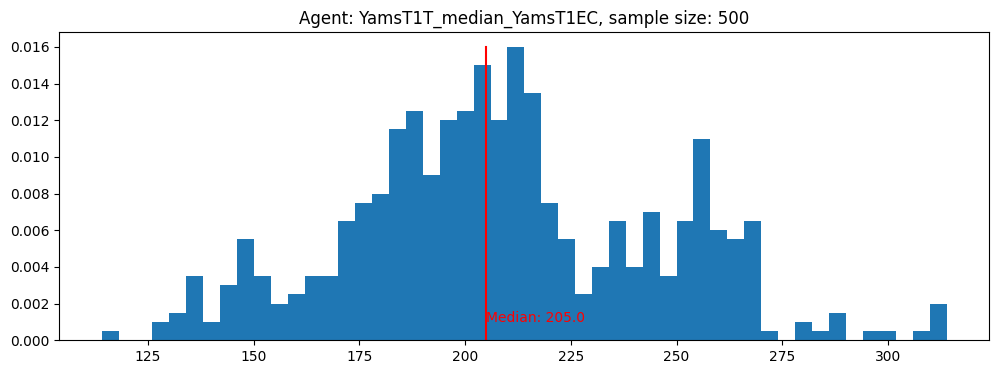

  0%|          | 0/10000 [00:00<?, ?it/s]